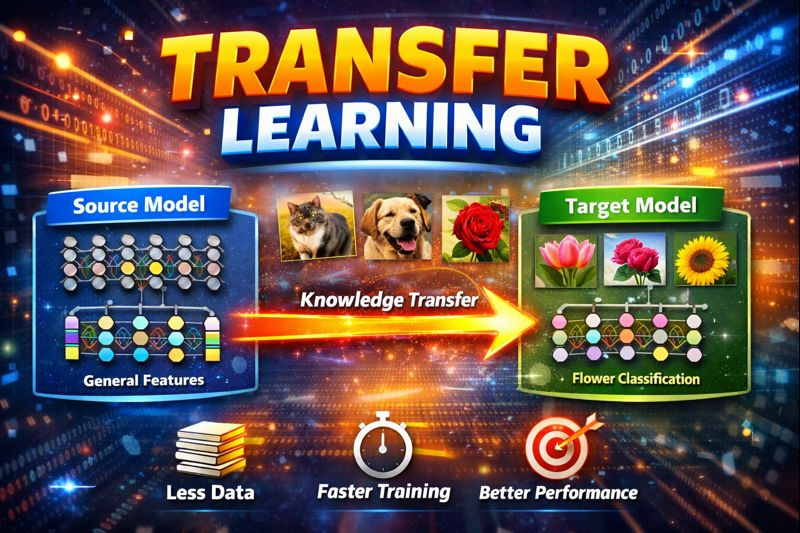

# Transfer learning

**Transfer learning** in deep learning reuses a model trained on one task as a starting point for a new, related task, saving time and data by leveraging learned features (like edges, shapes in images). Instead of training from scratch, you adapt a pre-trained model (e.g., VGG, BERT) by freezing early layers (feature extraction) or fine-tuning later layers for your specific dataset, making it powerful for tasks with limited data like medical imaging or specific NLP problems.

[This video provides a visual overview of how transfer learning works:](https://youtu.be/MQkVIYzpK-Y?si=LJQVvQhf9DoDlY9P)


# How it Works (Key Concepts)
* **Source Task/Model:** A model (e.g., trained on ImageNet for general image recognition) that has learned broad, useful features.
* **Target Task/Model:** Your new, specific problem (e.g., classifying types of flowers).
* **Feature Extraction:** Early layers of a neural network learn general features (edges, colors), while later layers learn task-specific features (cat ears, dog noses).
* **Knowledge Transfer:** Reusing the general features from the source model for the target task.


**Benefits**
* **Less Data:** Achieves high accuracy with small datasets.
* **Faster Training:** Significantly reduces training time.
* **Better Performance:** Often leads to more robust models.

# When to Use It
* When you have a complex task but limited labeled data.
* When your new task is related to the original training task (e.g., general objects to specific animals).
* Common in Computer Vision (CNNs) and Natural Language Processing (NLP).

Here's a list of popular **pre-trained models** in **Image**, **Audio**, **Video**, and **NLP** tasks:



### **Image Models**

1. **VGG16**

   * A deep convolutional neural network pre-trained on ImageNet for image classification tasks. It is often used as a starting point for image-related tasks like object detection or style transfer.
2. **ResNet50**

   * A very popular deep learning model for image classification, known for its residual connections that help prevent the vanishing gradient problem, and it’s widely used in tasks such as image segmentation or object detection.
3. **InceptionV3**

   * A deep convolutional network trained on ImageNet, known for its high accuracy and used in image classification and detection. It’s designed to improve efficiency and performance.



### **Audio Models**

1. **VGGish**

   * A pre-trained model for audio classification based on VGG architecture, trained on large audio datasets for tasks like sound event detection, music genre classification, or emotion detection from audio.

2. **Wav2Vec 2.0**

   * A model pre-trained on raw audio for speech recognition tasks. It can be fine-tuned for specific tasks like transcribing spoken language or voice activity detection.

3. **OpenL3**

   * A model for audio embeddings, useful for tasks like sound classification, music recommendation, or audio segmentation. It works by extracting high-level representations of audio.



### **Video Models**

1. **I3D (Inflated 3D ConvNet)**

   * A model designed for video action recognition, based on inflating 2D convolution filters to 3D. It’s widely used for recognizing actions or events in video data.

2. **SlowFast Networks**

   * A video classification model that captures both slow and fast patterns in video data, making it useful for tasks like action recognition, activity detection, or video understanding.

3. **C3D (Convolutional 3D Networks)**

   * A model pre-trained for video classification, which learns 3D spatiotemporal features from video data. It's typically used for action recognition or other video-related tasks.



### **NLP Models**

1. **BERT (Bidirectional Encoder Representations from Transformers)**

   * One of the most popular pre-trained models for various NLP tasks such as question answering, text classification, named entity recognition (NER), and more.

2. **GPT (Generative Pre-trained Transformer)**

   * A generative language model pre-trained on vast amounts of text. It is widely used for text generation, language modeling, and can be fine-tuned for a variety of NLP applications.

3. **RoBERTa (Robustly Optimized BERT Pretraining Approach)**

   * A variation of BERT, optimized for better performance in NLP tasks. It is often used for tasks like text classification, NER, and sentiment analysis.


In [9]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('T4 GPU'))



TensorFlow version: 2.19.0
GPU Available: []


In [10]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [11]:
!kaggle datasets download -d alxmamaev/flowers-recognition
!unzip flowers-recognition.zip

Dataset URL: https://www.kaggle.com/datasets/alxmamaev/flowers-recognition
License(s): unknown
flowers-recognition.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  flowers-recognition.zip
replace flowers/daisy/100080576_f52e8ee070_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c

# STEP 1: Import Required Libraries

In [12]:
!apt-get -qq install graphviz
!pip install pydot


In [13]:

import os
import random
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

📌 **Why these libraries?**

*   ImageDataGenerator → load & augment images
*   MobileNetV2 → pre-trained CNN
*   Dense → classification layer

# Step 3 : Visualize Random Images from Dataset 📸

❓ **Why**

Always inspect data before training (best ML practice).

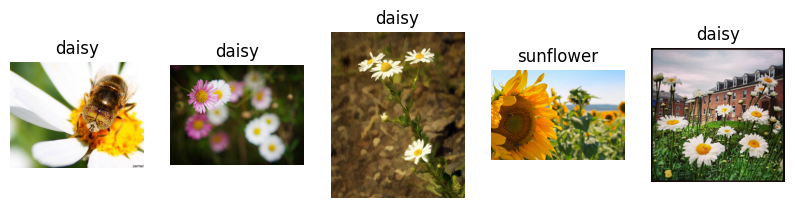

In [14]:
data_dir = "flowers"
Classes = os.listdir(data_dir)


plt.figure(figsize=(10,6))


for i in range(5):
  class_name = random.choice(Classes)
  img_name = random.choice(os.listdir(os.path.join(data_dir , class_name)))
  img_path = os.path.join(data_dir, class_name, img_name)

  img = plt.imread(img_path)

  plt.subplot(1,5,i+1)
  plt.imshow(img)
  plt.title(class_name)
  plt.axis("off")

plt.show()

🧩 **How it works**

* Randomly selects class folder
* Picks random image
* Displays images with labels

# Step :3 Image Size & Batch Size

**❓ Why**

Pre-trained models expect fixed input size.

* 📌 MobileNetV2 requires 224×224 RGB images













In [15]:
IMG_SIZE = 224
BATCH_SIZE = 32

# STEP 4: Image Data Generator
❓ Why

Loads images efficiently + applies preprocessing.

| Feature          | Purpose              |
| ---------------- | -------------------- |
| rescale          | Normalize pixels     |
| validation_split | Auto train/val split |


In [16]:
datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)

# STEP 5: Load training and validation data

In [17]:
train_data = datagen.flow_from_directory(
    "flowers",
    target_size = (IMG_SIZE , IMG_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = "categorical",
    subset = "training"
)

Found 3457 images belonging to 5 classes.


In [18]:
valid_data = datagen.flow_from_directory(
    "flowers",
    target_size = (IMG_SIZE , IMG_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = "categorical",
    subset = "validation"
)

Found 860 images belonging to 5 classes.


# STEP 6: Visualization

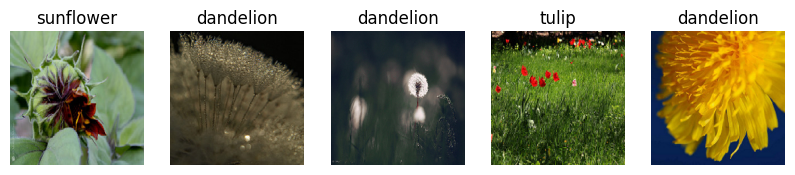

In [19]:
images, labels = next(train_data)

plt.figure(figsize=(10,6))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(images[i])
    plt.title(list(train_data.class_indices.keys())[labels[i].argmax()])
    plt.axis("off")
plt.show()


# STEP 7: Load Pre-trained and Freeze Base Mode

In [20]:
#load pre trained model

base_model = MobileNetV2(
    weights = "imagenet",
    include_top = False,
    input_shape = (IMG_SIZE , IMG_SIZE , 3)
)
base_model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [21]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
output = Dense(train_data.num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)


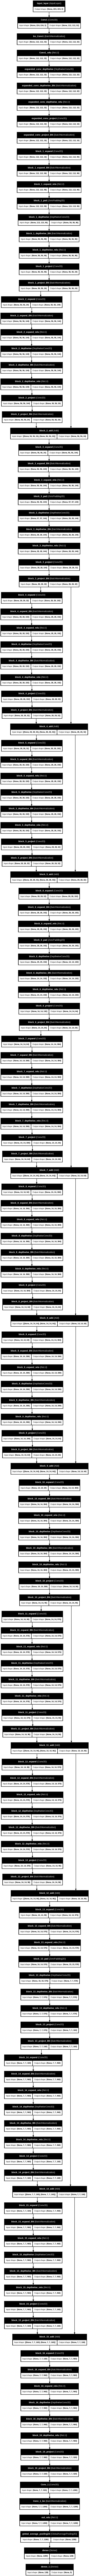

In [22]:
plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
    dpi=100
)


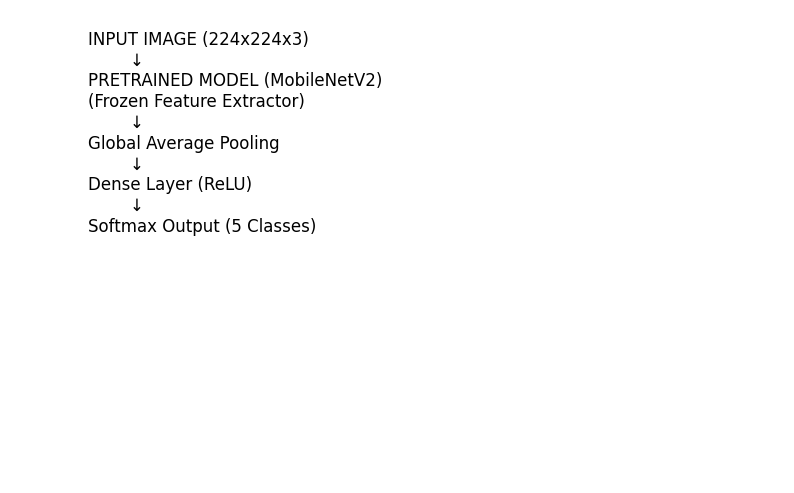

In [23]:
plt.figure(figsize=(10,6))
plt.text(0.1, 0.5,
"""
INPUT IMAGE (224x224x3)
        ↓
PRETRAINED MODEL (MobileNetV2)
(Frozen Feature Extractor)
        ↓
Global Average Pooling
        ↓
Dense Layer (ReLU)
        ↓
Softmax Output (5 Classes)
""",
fontsize=12)

plt.axis("off")
plt.show()


In [24]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [25]:
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,422,597 (9.24 MB)

 Trainable params: 164,613 (643.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

# **STEP 8 : Train Model**

In [26]:
history = model.fit(
    train_data,
    validation_data=valid_data,
    epochs=10
)


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


109/109 ━━━━━━━━━━━━━━━━━━━━ 62s 388ms/step - accuracy: 0.6918 - loss: 0.7970 - val_accuracy: 0.8744 - val_loss: 0.3628
Epoch 2/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 12s 111ms/step - accuracy: 0.9133 - loss: 0.2485 - val_accuracy: 0.8767 - val_loss: 0.3575
Epoch 3/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 12s 110ms/step - accuracy: 0.9520 - loss: 0.1610 - val_accuracy: 0.8756 - val_loss: 0.3588
Epoch 4/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 13s 114ms/step - accuracy: 0.9739 - loss: 0.1077 - val_accuracy: 0.8674 - val_loss: 0.3789
Epoch 5/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 12s 106ms/step - accuracy: 0.9796 - loss: 0.0764 - val_accuracy: 0.8674 - val_loss: 0.4260
Epoch 6/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 21s 110ms/step - accuracy: 0.9899 - loss: 0.0508 - val_accuracy: 0.8674 - val_loss: 0.4168
Epoch 7/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 12s 109ms/step - accuracy: 0.9935 - loss: 0.0383 - val_accuracy: 0.8605 - val_loss: 0.4831
Epoch 8/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 12s 109ms/step - accuracy: 0.9984 - loss: 0.0206 - val

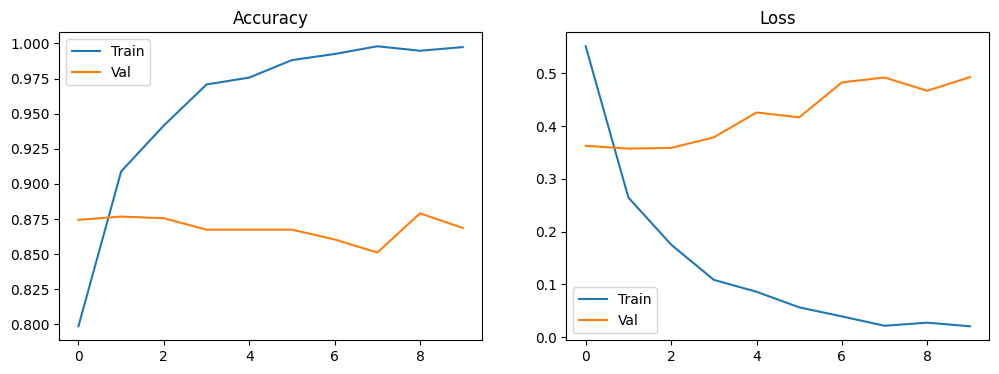

In [27]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title("Loss")
plt.legend()

plt.show()


# STEP 9 : Fine-Tuning (Advanced)
❓ Why

Improve accuracy by adjusting high-level features.

In [28]:
base_model.trainable = True

for layer in base_model.layers[:100]:
    layer.trainable = False


In [29]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(
    train_data,
    validation_data=valid_data,
    epochs=5
)


Epoch 1/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 58s 303ms/step - accuracy: 0.8408 - loss: 0.4458 - val_accuracy: 0.8756 - val_loss: 0.5119
Epoch 2/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 12s 109ms/step - accuracy: 0.9137 - loss: 0.2388 - val_accuracy: 0.8895 - val_loss: 0.4731
Epoch 3/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 21s 114ms/step - accuracy: 0.9376 - loss: 0.1803 - val_accuracy: 0.8942 - val_loss: 0.4561
Epoch 4/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 12s 111ms/step - accuracy: 0.9607 - loss: 0.1164 - val_accuracy: 0.8872 - val_loss: 0.4475
Epoch 5/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 12s 111ms/step - accuracy: 0.9693 - loss: 0.0911 - val_accuracy: 0.8849 - val_loss: 0.4428


In [30]:
model.save("flower_transfer_model.h5")
